# Analysis of extracted features
This notebook serves the purpose to depict the distribution of the extracted features.

In [1]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

filenames =['usersdata.csv','relations_features2.csv']

path = "/Users/jonasmuller/Local_Folder/Project NTDS/"
usersdata = path + filenames[0]
file_extracted = filenames[1]

In [2]:
# load
features_given = pd.read_csv(usersdata, sep = "\t", names=["userID", "gender", "timePassedValidation", "ageGroup","label"])
features_extracted = pd.read_csv(file_extracted, sep = "\t")
features_extracted = features_extracted.rename(columns = {'src':'userID'})

In [3]:
# merge dataframes
features_tot = pd.DataFrame()
features_tot = features_given[['userID','label']].set_index('userID')

features_tot = pd.merge(features_tot,features_extracted.set_index('userID'), on='userID', how='outer',sort=True).dropna()

features_tot

,label,dt_1,dt_2,dt_3,dt_4,dt_5,dt_6,dt_7,dout_1,dout_2,...,duni_6,duni_7,dnbi_1,dnbi_2,dnbi_3,dnbi_4,dnbi_5,dnbi_6,dnbi_7,n_bidir
userID,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0.0,40.0,61.0,53.0,121.0,0.0,0.0,0.0,...,115.0,0.0,0.0,0.0,5.0,5.0,16.0,0.0,0.0,24.0
2,0,1.0,0.0,28.0,41.0,65.0,159.0,0.0,0.0,0.0,...,133.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,12.0
3,0,0.0,9.0,29.0,8.0,6.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0
4,0,0.0,0.0,5.0,9.0,15.0,7.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,5.0
5,0,0.0,0.0,5.0,11.0,11.0,11.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607442,0,0.0,0.0,20.0,17.0,9.0,4.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,6.0
5607443,0,0.0,0.0,14.0,0.0,65.0,131.0,0.0,0.0,0.0,...,107.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5607444,0,0.0,0.0,1.0,0.0,33.0,79.0,0.0,0.0,0.0,...,78.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0


In [4]:
print(f'Number of rows: \t{features_tot.shape[0]}')
print(f'Number of NaN rows: \t{features_tot.iloc[: , 2].isna().sum()}')

Number of rows: 	5321960
Number of NaN rows: 	0


In [28]:
def plot_p_of_k(data,title):
    # drop zeros for loglog plot
    data = data.loc[(data!=0)]

    ax = plt.figure(figsize=(7, 7))

    x1 = data.loc[features_tot['label'] == 0].to_numpy()
    x2 = data.loc[features_tot['label'] == 1].to_numpy()

    names = ['Non-spammer', 'spammer']

    nbin = 70

    bin_edge = np.logspace(np.log10(min(x1)), np.log10(max(x1)), num = nbin)
    bin_center = np.convolve(bin_edge, np.ones((2,))/2, mode='valid')

    hist1, a = np.histogram(x1, bins = bin_edge, density = True)
    hist2, a = np.histogram(x2, bins = bin_edge, density = True)

    plt.loglog(bin_center, hist1,'.')
    plt.loglog(bin_center, hist2,'.')

    # Plot formatting
    plt.legend(names)
    plt.xlabel('k')
    plt.ylabel('p(k)')
    lim = plt.ylim()
    yticks = np.power(10.0,list(range(0,int(np.floor(np.log10(lim[0]))),-2)))
    plt.yticks(ticks = yticks)
    plt.title(title)
    
    plt.savefig(f'figures/{title}.png',dpi = 300)

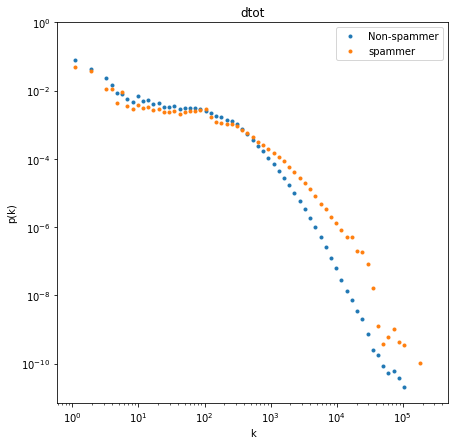

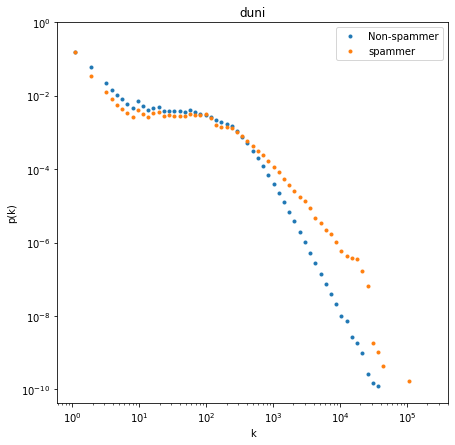

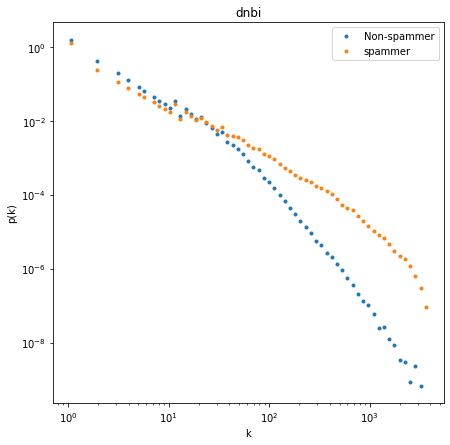

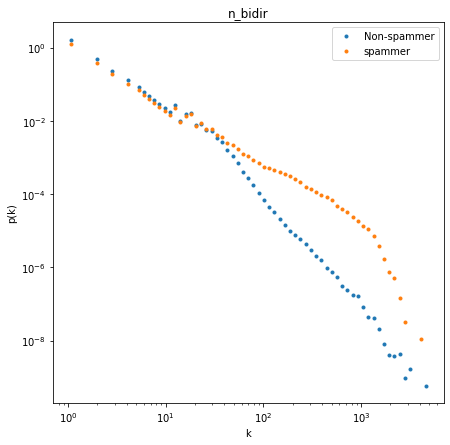

In [29]:
# plot different distributions
data = features_tot.loc[:, features_tot.columns.str.startswith('dt_')].sum(axis=1)
plot_p_of_k(data,'dtot')

#data = features_tot.loc[:, features_tot.columns.str.startswith('dt_')].sum(axis=1)
data = features_tot.loc[:, features_tot.columns.str.startswith('duni_')].sum(axis=1)
plot_p_of_k(data,'duni')

data = features_tot.loc[:, features_tot.columns.str.startswith('dnbi_')].sum(axis=1)
plot_p_of_k(data,'dnbi')

data -= features_tot['n_bidir']
plot_p_of_k(data.abs(),'n_bidir')